# 8. Weight of Evidence Encoding

Weight of Evidence (WoE) encoding is commonly used in credit scoring and risk modeling.
It calculates the logarithm of the ratio of the probability of the target variable being
true (or false) for a particular category compared to the overall probability.
WoE encoding captures the predictive power of each category relative to the target variable.

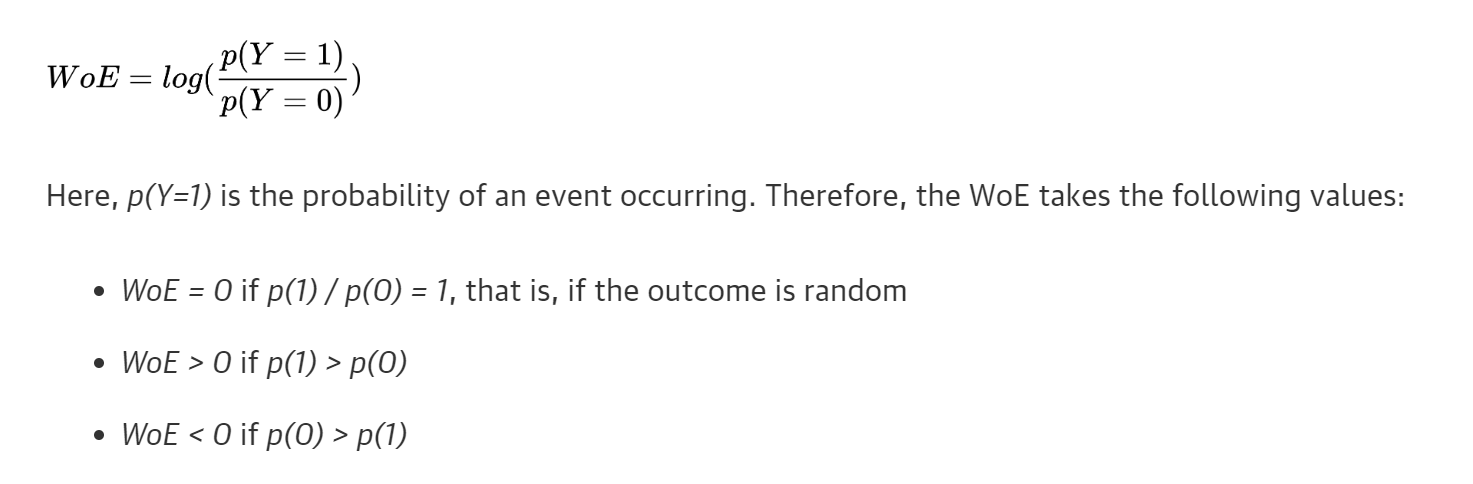

**Weight of Evidence (WoE)** is a statistical technique used in credit scoring and risk modeling to transform categorical variables into continuous variables. It measures the strength of the relationship between a categorical variable and a binary target variable.

The formula to calculate the WoE for a category is as follows:

**WoE = ln((% of non-events in the category) / (% of events in the category))**

The WoE value represents the logarithm of the ratio of the percentage of non-events (negative outcomes) to the percentage of events (positive outcomes) for a specific category. It provides information on how well a category separates the events from non-events.

The main advantages of using WoE encoding are:

1. Handles missing values: WoE encoding can handle missing values by assigning them a separate category or by using an additional "missing" category.

2. Handles outliers: WoE encoding is not affected by outliers since it focuses on the distribution of the target variable within each category.

3. Monotonicity: WoE encoding preserves the monotonic relationship between the encoded variable and the target. It helps in establishing the predictive power of a variable and is suitable for modeling techniques that rely on monotonicity assumptions, such as logistic regression.

4. Enables variable transformation: The resulting WoE values can be used to transform categorical variables into continuous variables, allowing for more straightforward analysis and modeling.

When using WoE encoding, it's important to consider certain aspects:

- Rare categories: Categories with very few observations may have unstable WoE values. It's common to group rare categories together or assign them a special value to address this issue.

- Overfitting: WoE encoding can potentially lead to overfitting if there are too many categories or if the relationship between the categorical variable and the target variable is weak.

- Information Value (IV): IV is a measure derived from WoE that quantifies the predictive power of a variable. It considers the differences in distribution between events and non-events across categories. Higher IV values indicate stronger predictive power.

Overall, WoE encoding is a valuable technique for transforming categorical variables into continuous representations that capture the relationship with a binary target variable. It provides insights into the predictive power of the categories and can be used as input for various machine learning models.

In [4]:
import pandas as pd
import numpy as np

In [13]:
def calculate_woe(df, feature, target):
    # Create a cross-tabulation table of the feature and target variable
    cross_table = pd.crosstab(df[feature], df[target], normalize='index')

    # Calculate the percentage of positive and negative outcomes for each category
    cross_table['event_rate'] = cross_table[1] / cross_table[0]
    cross_table['non_event_rate'] = (cross_table[0] - cross_table[1]) / cross_table[0]

    # Calculate the overall proportion of positive and negative outcomes
    overall_event_rate = df[target].sum() / len(df)
    overall_non_event_rate = 1 - overall_event_rate

    # Calculate the weight of evidence (WoE) for each category, applying custom smoothing
    cross_table['woe'] = np.log(
        (cross_table['event_rate'] + 0.5 * overall_event_rate) /
        (cross_table['non_event_rate'] + 0.5 * overall_non_event_rate)
    )

    # Information value
    cross_table['iv'] = (cross_table['event_rate'] - cross_table['non_event_rate']) * cross_table['woe']

    # Create a dictionary mapping the categories to their corresponding WoE values
    woe_dict = cross_table['woe'].to_dict()

    return woe_dict

def woe_encode(df, feature, target):
    # Calculate the weight of evidence (WoE) dictionary for the feature
    woe_dict = calculate_woe(df, feature, target)

    # Replace the original categorical values with their WoE values, handling NaN with a default value
    df[feature + '_woe'] = df[feature].map(woe_dict).fillna(0)

    return df

In [24]:
# Example usage
# Assuming we have a DataFrame called 'df' with a categorical feature 'category' and a binary target 'target'
df = pd.DataFrame({
    'category': ['Apple', 'Banana', 'Apple', 'Cherry', 'Cherry', 'Banana', 'Apple', 'Banana', 'Cherry', 'Apple'],
    'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
    });

df

,category,target
0,Apple,1
1,Banana,0
2,Apple,1
3,Cherry,0
4,Cherry,1
5,Banana,0
6,Apple,1
7,Banana,0
8,Cherry,1
9,Apple,0


In [38]:
# Group the DataFrame by the 'category' column
df.groupby(['category'])['target'].count()

category
Apple     4
Banana    3
Cherry    3
Name: target, dtype: int64

In [30]:
df = woe_encode(df, 'category', 'target');

df

C:\Users\siang.sambo\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,category,target,category_woe
0,Apple,1,0.000000
1,Banana,0,-1.609438
2,Apple,1,0.000000
3,Cherry,0,0.000000
4,Cherry,1,0.000000
5,Banana,0,-1.609438
6,Apple,1,0.000000
7,Banana,0,-1.609438
8,Cherry,1,0.000000
9,Apple,0,0.000000


In this example, the calculate_woe() function calculates the weight of evidence (WoE) for each category in the feature column, based on the target variable. The woe_encode() function then applies the WoE encoding to the feature column in the provided DataFrame df and creates a new column with the suffix "_woe" to store the encoded values.

Note that the above code assumes that the binary target variable takes the values 0 and 1. If your target variable has different values, you may need to adjust the code accordingly.

Remember to preprocess your data and handle missing values appropriately before applying WoE encoding.